# lab 2 data science
marco jurado 20308
cristian aguirre 

In [79]:
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Parte 1 -  Preparación de datos
Primero con pickle obtenemos los datos de entreno, prueba y validación

In [80]:
trainData = pd.read_pickle("./Datos_Rotulos_Trafico/entrenamiento.p")
testData = pd.read_pickle("./Datos_Rotulos_Trafico/prueba.p")
validateData = pd.read_pickle("./Datos_Rotulos_Trafico/validacion.p")

In [81]:
rotulosEntreno = trainData['features']
labels = trainData['labels']

In [82]:
rotulosEntreno.shape

(34799, 32, 32, 3)

In [83]:
labels.shape

(34799,)

Ya que vimos el arreglo de imagenes, su forma y todo podemos entonces hacer el modelo con sklearn y hacer las matrices numericas de las imagenes de los rotulos.

In [84]:
rotulosEntreno = rotulosEntreno.astype(np.float32) / 255.0 # como visto en clase se convierte en numericos para obtener las matrices.

Hacemos el split con sklearn.

In [85]:
train_features, test_features, train_labels, test_labels = train_test_split(rotulosEntreno, labels, test_size=0.2, random_state=42)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

Ahora unos ejemplos de como son y como se pueden ver los ejemplos

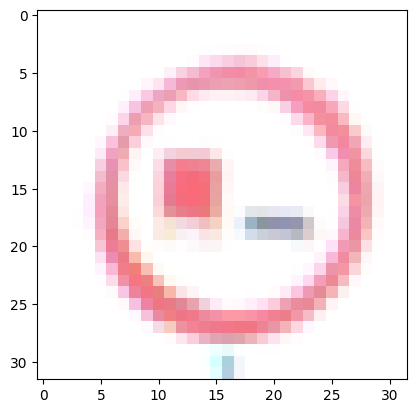

In [86]:
plt.imshow(train_features[0])

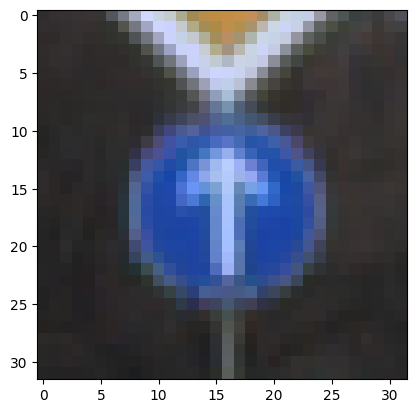

In [87]:
plt.imshow(train_features[1])

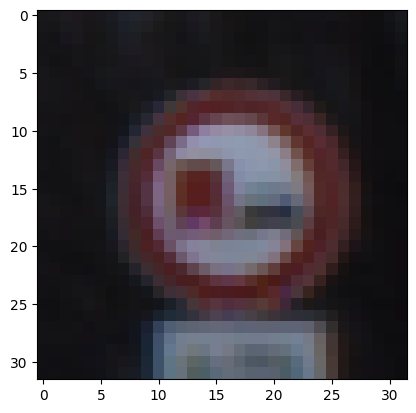

In [88]:
plt.imshow(train_features[2])

Ya viendo estos ejemplos podemos ver que las imagenes ya han sido entonces pre-procesadas y redimensionadas a un tamaño estandar.

## Parte 2 - Implementación de la arquitectura Le-Net

Primero comenzamos explicando un poco sobre la arquitectura Le-Net. Esta es implementadad en Redes Neuronales Convolucionales (CNN) y fue catalogada como muy util para reconocer patrones. Fue usada principalmente para poder encontrar patrones en imagenes de digitos escritos a mano para lo cual usa varias capas como lo son la capa de convolución, submuestreo y fullt connected. <br><br>

Comenzando por la capa de convolución, usa un filtro de 5x5 con filtros variables y una función de activación que sirve para detectar las caracteristicas de la imagen de entrada. <br><br>

Luego la capa de submuestreo de filtro 2x2 con la función de pooling donde se reduce la dimensionalidad de los detalles importantes captados por la capa convulucional. <br><br>

Continúa con una segunda capa convulucional de filtro 5x5 con filtros variables con una función de activación donde se suele usar una sigmoide, tanh, ReLu. En esta capa ocurre lo mismo que la capa 1 pero con los datos recuperados de la caa de pooling.<br><br>

Una segunda capa de pooling de 2x2 donde se vuelve a reducir las dimensiones de la segunda capa convulucional.<br><br>

Casi terminando tenemos la capa fully connected donde las neuronas usan una función de activación ya sea sigmoide, tanh, ReLu u otras y combina la información obtenida. <br><br>

Así obtenemos el output que nos da las predicciones de la red donde se usa softmax o sigmoide normalmente (funcinoes de activación de clasificación). 

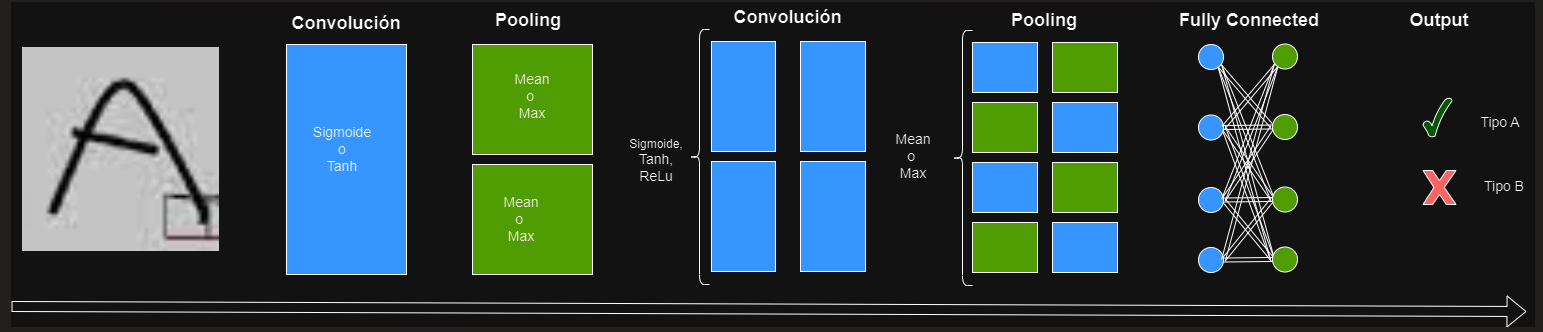

## Parte 3 - Contrucción de modelo

Se construye el modelo con las layers correspondientes al modelo de Le-Net usando la función de activación de ReLu. Donde se define tambien la función de output con softmax y 43 posibles tipos pues se nos detalla que son 43 tipos de rotulos. 

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=43, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

En este caso se ha definido la función de perdida y el optimizador para el modelo. La primera, Adam (Adaptive Moment Estimation) es una función de optimización que ajusta los parametros de una red que en nuestro caso es para el modelo que estamos construyendo. Esta función usa el descenso de gradiente y RMSP para saber como ir ajustando los parametros de la red y así minimizar la perdida del modelo. <br><br>
Luego al ver la función de perdida sparse_categorical_crossentropy es utilizadad cuando tenemos varias categorias de las cuales nuestro modelo es responable de generar predicciones. Esta función es la métrica que va diciendole al modelo que tan bien o que tan mal están sus predicciones. Esta es importante pues al tener la perdida podemos saber que tan alejadas o acertadas van siendo las predicciones del modelo y así poder ajustar los parametros con la función de optimización. Aqui puede observar un resumen del modelo implementado.

In [90]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_21 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_22 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 400)               0         
                                                                 
 dense_30 (Dense)            (None, 120)             

## Parte 4 - Entrenamiento del modelo

El proceso de entrenamiento de una red neuronal consta de un proceso de varias iteraciones donde básicamente ocurren los siguientes pasos una vez la red fue iniciada:
- Forward propagation <br> 
En este paso nuestras imagenes de rotulos pasan por la red pasando por las capas de convolución y pooling respecivamente hasta dar un resultado.<br><br> 
- Loss function <br>
Con los resultados obtenidos del paso de forward propagation se calcula la perdida (que tan acertadas son las predicciones del modelo) con la función de perdida que en nuestro caso es sparse_categorical_crossentropy y dependiendo de los valores obtenidos se estima en un valor medible la perdida.<br><br> 
- Backpropagation <br>
Se calcula cada uno de los parametros de la red que dieron ese valor de la función de perdida con la regla de la cadena para poder entender que parametros son los que dieron dicho valor. <br><br> 
- Optimización <br>
Con la función de Adam se calcula la combinación de pesos y sesgos óptima en la red para una menor perdida.<br><br> 
- Volver a repetir paso de forward propagation <br>
Se vuelven a repetir los pasos mencionados arriba por varias iteraciones que en una red son llamadas epocas.<br><br>  
- Validación <br>
Después de una X cantidad de epocas de entrenamiento se hace una validación para así poder ver la red y poder determinar a criterio del cientidico de datos si el modelo está presentando un overfit de los datos y poder ajusar el número de epocas, las funciones de perdida, optimización y activación. <br><br> 

En nuestro caso para poder entrenar la red neuronal cargaremos los datos de prueba y pondremos a entrenar el modelo.

In [91]:
print("train_features shape:", train_features.shape)
print("train_labels shape:", train_labels.shape)
print("val_features shape:", val_features.shape)
print("val_labels shape:", val_labels.shape)

train_features shape: (22271, 32, 32, 3)
train_labels shape: (22271,)
val_features shape: (5568, 32, 32, 3)
val_labels shape: (5568,)


In [92]:
entrenamientoModelo = model.fit(train_features, train_labels, epochs=10, batch_size=64, validation_data=(val_features, val_labels))
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

Epoch 1/10


348/348 [==============================] - 5s 12ms/step - loss: 1.9515 - accuracy: 0.4801 - val_loss: 0.8808 - val_accuracy: 0.7548
Epoch 2/10
348/348 [==============================] - 4s 12ms/step - loss: 0.6718 - accuracy: 0.8065 - val_loss: 0.6171 - val_accuracy: 0.8062
Epoch 3/10
348/348 [==============================] - 4s 12ms/step - loss: 0.4251 - accuracy: 0.8764 - val_loss: 0.3720 - val_accuracy: 0.8860
Epoch 4/10
348/348 [==============================] - 4s 12ms/step - loss: 0.3139 - accuracy: 0.9109 - val_loss: 0.2901 - val_accuracy: 0.9230
Epoch 5/10
348/348 [==============================] - 4s 12ms/step - loss: 0.2365 - accuracy: 0.9346 - val_loss: 0.2370 - val_accuracy: 0.9366
Epoch 6/10
348/348 [==============================] - 4s 12ms/step - loss: 0.1970 - accuracy: 0.9464 - val_loss: 0.2188 - val_accuracy: 0.9400
Epoch 7/10
348/348 [==============================] - 4s 12ms/step - loss: 0.1609 - accuracy: 0.9542 - val_loss: 0.1847 - val_accuracy: 0.9526
Epoch 8/10

## Parte 5 - Evaluación y métricas

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

In [94]:
predicted_probabilities = model.predict(test_features)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
print(classification_report(test_labels, predicted_labels))

218/218 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.97      0.92      0.95       425
           2       0.93      0.91      0.92       394
           3       0.86      0.91      0.88       242
           4       0.98      0.92      0.95       373
           5       0.91      0.89      0.90       338
           6       1.00      0.95      0.97        56
           7       0.94      0.91      0.92       242
           8       0.87      0.97      0.92       237
           9       0.96      0.98      0.97       253
          10       0.99      1.00      0.99       332
          11       0.99      0.95      0.97       229
          12       0.99      0.99      0.99       417
          13       0.98      0.99      0.98       386
          14       1.00      0.99      1.00       130
          15       0.97      0.94      0.96       125
          16       0.86   

In [95]:
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precisión: 0.9549698240049633
Recall: 0.9528735632183908
F1-Score: 0.9531422356989587


### **Interpretacion de resultados**

En general, el modelo tiene un rendimiento bastante alto con un 96% de precisión. Y al considerar las métricas de cada clase podemos notar que hay algunas clases con las que el modelo tiene un desempeño ligeramente peor que otras. Esto puede ser útil para identificar clases problemáticas y potencialmente mejorar el rendimiento del modelo en estas clases.

## Parte 6 - Mejoras y experimentación

### **Experimentos realizados**

#### **Regularizacion**

Consideramos que puede ser útil usar regularización en nuestro modelo para mejor el desempeño del mismo, pues esta técnica nos ayuda a reducir el overfitting evitando que el modelo se adapte demasiado a las peculiaridades del conjunto de entrenamiento y mejora la capacidad del modelo para generalizar y desempeñarse bien en datos no vistos previamente.

- Codigo utilizado:

In [96]:
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=84, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(units=43, activation='softmax') 
])


**Resultado**

- Precisión: 0.9160672949196417
- Recall: 0.9186781609195402
- F1-Score: 0.9151013798376684

Se pudo observar una disimunción en el desempeño del modelo por lo que es posible que la introducción de Dropout junto con la regularización L2 haya sido demasiado para el modelo, pues si se aplica mucha regularización a un modelo, puede generar underfitting, lo cual vuelve al modelo demasiado simple para capturar la estructura de los datos. En la vida real, esta técnica puede ser aplicable para mejorar el desempeño del modelo, sin embargo es importante considerar que para obtener mejores resultados, debemos considerar otros aspectos a ajustar en nuestro modelo, por ejemplo en este caso al agregar Dropout obtuvimos malos resultados, pero es posible que si aumentáramos las épocas, nuestro modelo podría llegar a converger de mejor manera, siempre teniendo en cuenta que esto requiere de más recursos lo cual resulta en un mayor tiempo de ejecución. 


#### **Cambio de optimizador**

Hemos decidido hacer un cambio de optimizador para aplicar RMSprop, ya que este es un optimizador que ajusta automáticamente la tasa de aprendizaje mientras se entrena y esto nos puede ayudar a que nuestro modelo se adapte de mejor manera y obtenga mejores resultados. 

- Codigo utilizado:

In [97]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Resultado**

- Precisión: 0.9655346504192862
- Recall: 0.9640804597701149
- F1-Score: 0.96420126757532

Al cambiar el optimizador por RMSprop pudimos notar un aumento en la precisión y desempeño de nuestro modelo, lo cual es esperado y tiene bastante sentido debido a que al ajustarse el Learning Rate de manera automática, permite que el modelo converga más rápidamente. Así mismo es importante mencionar que este optimizador permite al modelo manejar de manera efectiva los problemas comunes con el descenso del gradiente.

### Recursos

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
- https://towardsdatascience.com/neural-network-optimizers-from-scratch-in-python-af76ee087aab
- https://medium.com/metadatos/t%C3%A9cnicas-de-regularizaci%C3%B3n-b%C3%A1sicas-para-redes-neuronales-b48f396924d4